# Übung
Build a model to predict Fashion MNIST

* Preparation
* Building
* Training
* Prediction
* Confusion Matrix
* Saving the model
Delivery as

1. NoteBook
2. Python Application (Functional or OOP)
**FOCUS on working application first of all, then optimize it and make it pretty**

**Dataset locally (Proxy)**
For the dataset (locally)

Download the dataset manually from : https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

Create Folder Called datasets\fashion-mnist under C:\Users\Administrator.keras
So you will have C:\Users\Administrator\.keras\datasets\fashion-mnist

Copy the 4x Downloaded files into the created folder

In [1]:
from keras import models 
from keras import layers
import matplotlib.pyplot as plt 
from tensorflow import keras
from pathlib import Path
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

## Daten ansehen

In [3]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


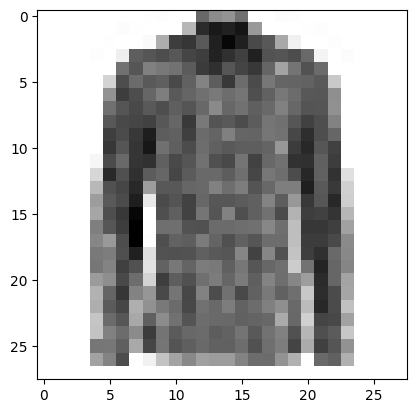

Label: 6


In [4]:
IMAGE_INDEX =112

digit = X_train[IMAGE_INDEX]
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()
print("Label:", Y_train[IMAGE_INDEX])

## Preparation Phase
### 1. Reshape the images from 28x28 to 784x1

In [5]:
X_train = X_train.reshape((60000,784))
print(X_train.shape)

X_test = X_test.reshape((10000,784))
print(X_test.shape)

(60000, 784)
(10000, 784)


### 2. Scale the input values from 0-255 --> 0-1

In [6]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

### 3. Prepare the label --> One hot encoding

In [7]:
Y_train = to_categorical(Y_train)
print("Label:", Y_train[IMAGE_INDEX])

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Build the Network

In [8]:
model = models.Sequential([
    keras.Input(shape=(784,)), # Input Layer
    keras.layers.Dense(512, activation= "sigmoid"), # 1. Hidden Layer              
    keras.layers.Dense(512, activation= "sigmoid"), # 2. Hidden Layer              
    keras.layers.Dense(512, activation= "sigmoid"), # 3. Hidden Layer              
    keras.layers.Dense(512, activation= "sigmoid"), # 4. Hidden Layer              
    keras.layers.Dense(512, activation= "sigmoid"), # 5. Hidden Layer              
    keras.layers.Dense(10, activation= "sigmoid"), # Output Layer    
])

### Get the Network Summary

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

### Compile / Configure the network
* loss: how bad is my model --> mse, mae, etc.
* optimizer: mechanism to update the weights and biases
* metrics: performance of my model --> accuracy

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer= "rmsprop", metrics= ["accuracy"])

### Train the model

In [11]:
history = model.fit(X_train, Y_train, epochs= 10, shuffle= True, validation_split= 0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2114 - loss: 1.9997 - val_accuracy: 0.6920 - val_loss: 0.8156
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7383 - loss: 0.6990 - val_accuracy: 0.7410 - val_loss: 0.7314
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8128 - loss: 0.5193 - val_accuracy: 0.8127 - val_loss: 0.5385
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8463 - loss: 0.4360 - val_accuracy: 0.8380 - val_loss: 0.4688
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8575 - loss: 0.3930 - val_accuracy: 0.8332 - val_loss: 0.4795
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8678 - loss: 0.3701 - val_accuracy: 0.8555 - val_loss: 0.4030
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8728 - loss: 0.3511 - val_accuracy: 0.8670 - val_loss: 0.3922
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8785 - loss: 0

### Plot the accuracy

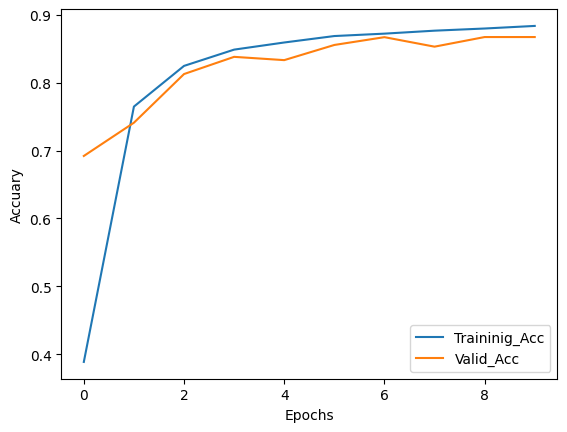

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Traininig_Acc", "Valid_Acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuary")
plt.show()

### Predicitons using Test Data

In [13]:
predictions = model.predict(x= X_test)
for i in predictions:
    print(i)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.1481305e-06 6.5678014e-06 2.5375019e-07 5.4849888e-06 3.7655295e-06
 5.2815962e-05 6.6120833e-06 4.5646055e-04 3.0293659e-06 2.2344735e-01]
[2.1244791e-04 2.4764665e-07 1.3859172e-01 7.3689199e-07 2.2828719e-04
 3.2503431e-07 8.7930536e-04 7.7588012e-08 8.8910372e-07 1.0082006e-06]
[1.1163050e-05 1.9147824e-01 2.1414369e-06 2.0985666e-04 1.7399209e-06
 2.1180131e-08 5.3365166e-06 9.6518738e-07 2.2658039e-06 5.8496892e-07]
[2.7596222e-06 7.6210618e-02 1.0643784e-06 3.9971140e-04 2.4155429e-06
 1.4983199e-08 2.5928434e-06 1.3485148e-06 1.7188059e-06 5.0061209e-07]
[1.2770827e-02 6.6798918e-07 2.9511633e-04 6.3743675e-05 4.8365018e-06
 9.1173627e-07 4.9745820e-02 1.6931264e-08 8.4372859e-06 5.4693731e-07]
[2.0545061e-05 2.3237047e-01 4.5816905e-06 1.7296626e-04 2.1581377e-06
 2.5645759e-08 8.8281504e-06 8.5666687e-07 2.9694245e-06 6.4438336e-07]
[1.1168885e-06 2.3255959e-06 8.3931221e-04 1.0120933e-04 7.6505691e-02
 3.3923607e-07 5.0553796e-04 1

In [14]:
rounded_predictions = np.argmax(predictions, axis = 1) # axis = 1 --> througt rows

for i in rounded_predictions:
    print(i)

9
2
1
1
6
1
4
6
5
7
4
5
7
3
4
1
2
2
8
0
2
5
7
5
1
2
6
0
9
3
8
8
3
3
8
0
7
5
7
9
0
1
3
7
6
7
2
1
4
6
4
2
5
8
2
2
8
4
8
0
7
7
8
5
1
1
3
3
7
8
7
0
2
6
2
3
1
2
8
4
1
8
5
9
5
0
3
2
0
2
5
3
6
7
1
8
0
1
4
2
3
6
7
6
7
8
5
7
9
4
2
5
7
0
5
2
8
6
7
8
0
0
9
9
3
0
8
2
1
5
4
1
9
1
8
4
6
1
2
5
1
0
0
0
1
6
1
3
2
2
3
2
1
3
5
0
4
7
9
3
7
2
3
9
0
9
4
7
4
2
0
5
6
1
2
1
3
0
9
1
0
9
3
0
7
9
9
4
4
7
1
2
3
6
3
2
8
3
6
1
1
0
2
9
2
4
0
7
9
8
4
1
8
4
1
3
1
6
7
2
8
5
3
0
7
7
6
2
7
0
7
8
9
2
9
0
5
1
4
2
5
6
9
2
2
8
6
2
2
4
9
7
0
5
5
4
8
5
2
3
0
4
8
0
0
6
3
8
9
0
1
3
0
2
3
0
8
3
7
4
0
1
6
3
0
6
0
7
5
3
5
9
5
3
5
5
1
9
8
3
3
3
6
8
0
0
2
9
7
7
1
3
6
4
2
4
7
1
6
4
6
2
6
5
6
2
7
7
7
3
3
7
3
7
1
3
7
2
2
3
4
0
3
1
0
1
9
4
9
9
1
7
8
3
3
0
2
4
8
0
1
6
2
4
4
7
3
4
2
5
0
7
9
4
0
9
3
9
3
3
5
0
0
3
5
8
1
6
2
6
6
4
9
5
2
0
6
6
1
2
0
9
7
0
3
4
3
0
2
3
0
6
7
0
9
4
2
1
5
4
5
3
8
5
8
4
4
8
9
8
6
2
4
4
2
4
1
6
1
3
0
7
8
8
4
5
3
1
9
5
3
3
0
1
2
2
9
4
0
6
0
4
2
0
0
3
3
8
2
8
9
4
0
7
0
4
3
9
2
9
5
9
3
7
5
7
8
1
0
0
6
4
8
9
7
9
1
2
7
3


### Compare between thruth data and predicted data

In [15]:
IMAGES_INDEX = 214 

print(Y_test[IMAGES_INDEX])
print(rounded_predictions[IMAGES_INDEX])

1
1


### Confusion Matrix

In [16]:
cm = confusion_matrix(Y_test, rounded_predictions)
cm

array([[861,   0,   4,  86,   5,   0,  38,   0,   6,   0],
       [  0, 946,   0,  48,   3,   0,   3,   0,   0,   0],
       [ 21,   0, 766,  32, 114,   0,  66,   0,   1,   0],
       [ 21,   2,   4, 950,   5,   0,  15,   0,   3,   0],
       [  0,   0,  78,  95, 784,   0,  43,   0,   0,   0],
       [  0,   0,   0,   1,   0, 947,   0,  24,  10,  18],
       [230,   0,  84,  73,  95,   0, 514,   0,   4,   0],
       [  0,   0,   0,   0,   0,  34,   0, 948,   0,  18],
       [  2,   0,   0,  17,   4,   2,  15,   4, 956,   0],
       [  0,   0,   0,   0,   0,  14,   1,  49,   0, 936]], dtype=int64)

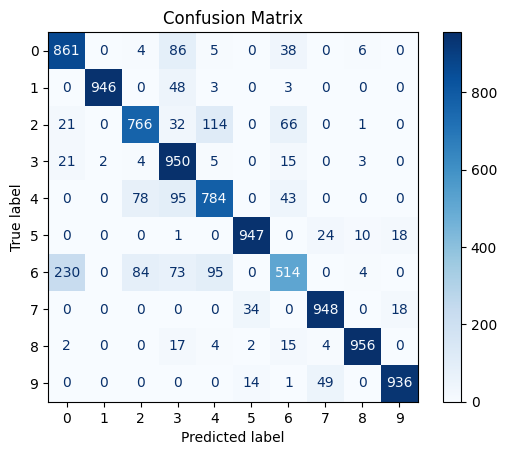

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Evaluate the model

In [18]:
loss_val, acc = model.evaluate(X_train, Y_train)

print("Loss:", loss_val)
print("Accuracy:", acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8826 - loss: 0.3226
Loss: 0.3278398811817169
Accuracy: 0.8817999958992004
